# Imports

In [149]:
import numpy as np
from iminuit.cost import ExtendedBinnedNLL
from Fit import Fit
from funcs import *
from stats import *
import scienceplots
plt.style.use(['grid'])

# Funcs

In [150]:
def G_R(w, R, R_L, L):
    return R/np.sqrt((R+R_L)**2 + (w*L)**2)

def fase_R(w, R, R_L, L):
    return np.arctan(w*L/(R+R_L))

def G_L(w, R, R_L, L, a, b):
    return b+ a*np.sqrt( np.power( R_L*(R+R_L) + np.power(w*L,2) , 2) + np.power(w*R*L, 2) ) / ( np.power(R+R_L,2) + np.power(w*L,2) )

def fase_L(w, R, R_L, L, a, b):
    return a*np.arctan(w*R*L / ( R_L*(R+R_L) + np.power(w*L,2) ) ) + b

# RL

In [151]:
if 1:
    path_folder = 'data/RL/'
    V_res, V_l, fase_res, fase_l, freqs, V_res_err, V_l_err, fase_err = [], [], [], [], [], [], [], []

    for i in sorted([int(i) for i in os.listdir(path_folder)]):

        path = path_folder+str(i)+'/'

        CH1,SGN,MTH, V_SGN, V_MTH, zero_CH1, zero_SGN, zero_MTH, m1, m2, m3, dt_CH1, dt_MTH, V_SGN_err, V_MTH_err, zero_err = analize(path, i, force=True, prec=1e-8,verbose=True)
        
        # x=np.linspace(np.min(CH1[0]), np.max(CH1[0]), 100)

        # plt.figure(figsize=(10,4))
        # plt.plot(x, sine(x, **m1.values.to_dict()), label='CH1 fit', color='red')
        # plt.plot(x, sine(x, **m2.values.to_dict()), label='SGN fit', color='blue')
        # plt.plot(x, sine(x, **m3.values.to_dict()), label='MTH fit', color='green')
        
        # # plt.plot(CH1[0], CH1[1], label='CH1', color='red')
        # # plt.plot(SGN[0], SGN[1], label='SGN', color='blue')
        # # plt.plot(MTH[0], MTH[1], label='MTH', color='green')

        # plt.scatter(zero_CH1, 0, color='red', label='zero CH1')
        # plt.scatter(zero_SGN, 0, color='blue', label='zero SGN')
        # plt.scatter(zero_MTH, 0, color='green', label='zero MTH')
        # plt.legend(ncol=2)
        # plt.show()
        # print(i, dt_CH1, dt_MTH)

        V_res.append(V_SGN)
        V_l.append(V_MTH)
        V_res_err.append(V_SGN_err)
        V_l_err.append(V_MTH_err)
        fase_res.append(dt_CH1*i*2*np.pi)
        fase_l.append(dt_MTH*i*2*np.pi)
        freqs.append(i)
        fase_err.append(zero_err*i*2*np.pi)

    V_res = np.array(V_res)
    V_l = np.array(V_l)
    V_res_err = np.array(V_res_err)
    V_l_err = np.array(V_l_err)
    fase_res = np.array(fase_res)
    fase_l = np.array(fase_l)
    freqs = np.array(freqs)
    fase_err = np.array(fase_err)

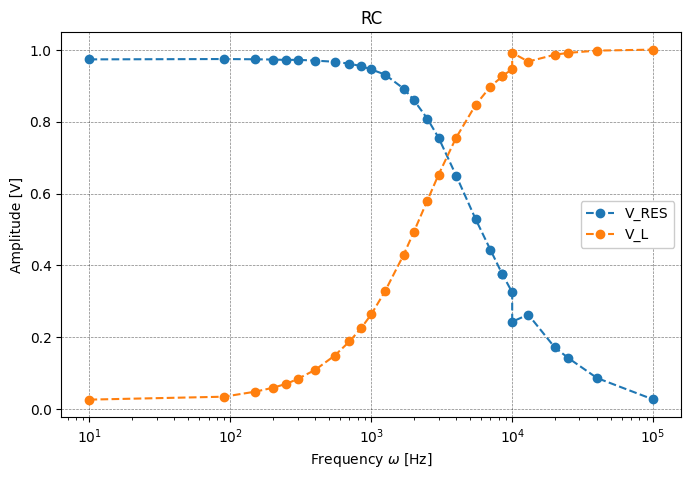

In [152]:
plt.figure(figsize=(8,5))
x = np.linspace(np.min(freqs),np.max(freqs),1000)

# plt.plot(x, H_R(x*2*np.pi, 1e3*12e-9, 0), label='Teorico')
# plt.plot(x, H_C(x*2*np.pi, 1e3*12e-9), label='Teorico')

plt.plot(freqs, V_res, 'o--', label='V_RES')
plt.plot(freqs, V_l, 'o--', label='V_L')
plt.title('RC')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.xscale('log')
plt.show()

C:\Users\yehan\AppData\Local\Temp\ipykernel_4160\2101964594.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


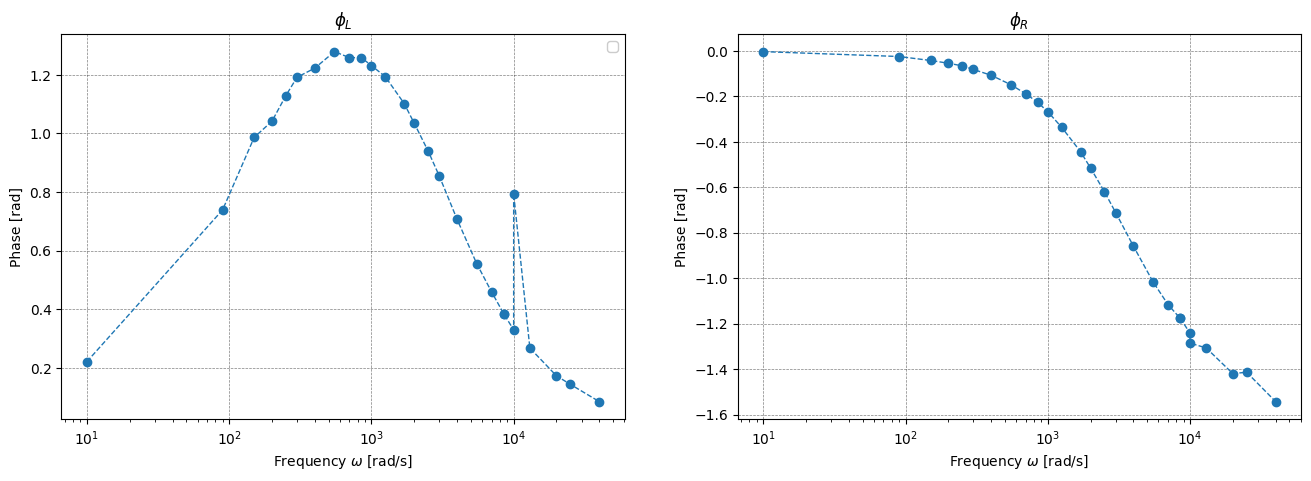

In [153]:
x = np.linspace(np.min(freqs),np.max(freqs),1000)

plt.subplots(1,2,figsize=(16,5))
plt.title('Dati')
plt.subplot(1,2,1)
plt.plot(freqs[:-1], -fase_l[:-1] + np.pi*2,'o--', lw=1)
plt.title('$\phi_L$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.legend()
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(freqs[:-1], -fase_res[:-1], 'o--', lw=1)
# plt.plot(x, fase_C(x*2*np.pi, 1e3, 12e-9, 0), label='Teorico')
# plt.plot(x, fase_R(x*2*np.pi, 1e3, 12e-9), label='Teorico')
plt.title('$\phi_R$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.xscale('log')

# plt.savefig('imgs/RC/fasi_no_log.jpeg', bbox_inches='tight', dpi=200)
plt.show()

# L

In [154]:
_i_range = ~np.isin(np.arange(freqs.size), [0,freqs.size-6])

In [155]:
c = LeastSquares( freqs[_i_range]*2*np.pi, -fase_l[_i_range] +np.pi*2, 0.01, fase_L)
f_f = Minuit(c, R=995, R_L=39.9, L=40e-3, a=1, b=0)
f_f.fixed['R', 'R_L', 'a'] = True, False, False

f_f.migrad()
f_f.minos()
f_f.hesse()

print(f_f.values['L'], f_f.errors['L'])
print(f_f.values)

0.04609070396634995 0.0008713773550898039
<ValueView R=995.0 R_L=29.099925434505916 L=0.04609070396634995 a=1.0279649111739375 b=-0.0027870180729207194>


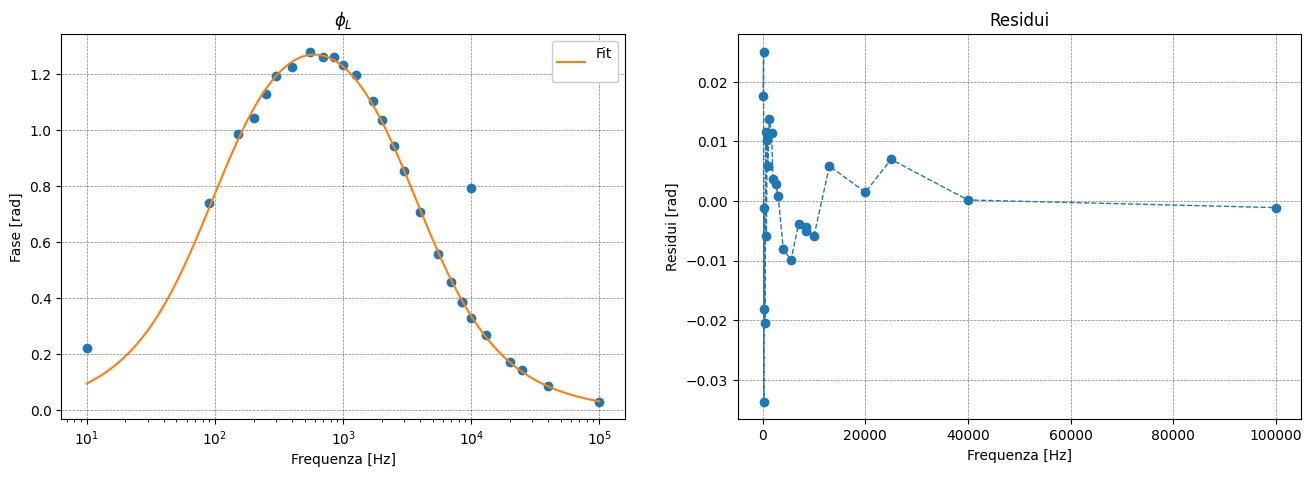

In [156]:
x = np.linspace(np.min(freqs),np.max(freqs),100000)
plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(freqs, -fase_l + np.pi*2, 'o', lw=1)
plt.plot(x, fase_L(x*2*np.pi, **f_f.values.to_dict()), label='Fit\n')
plt.title('$\phi_L$')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Fase [rad]')
plt.legend()
plt.xscale('log')

res = -fase_l + np.pi*2 - fase_L(freqs*2*np.pi, **f_f.values.to_dict())

plt.subplot(1,2,2)
plt.plot(freqs[_i_range], res[_i_range], 'o--', lw=1)
# plt.hist(res, bins=10)

plt.title('Residui')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Residui [rad]')
plt.savefig('imgs/RL/H_L_fase.pdf', bbox_inches='tight')

In [157]:
c = LeastSquares(freqs[_i_range]*2*np.pi, V_l[_i_range], V_l_err[_i_range], G_L)
f_m = Minuit(c, R=997, R_L=39.9, L=0.04, a=1, b=0)
f_m.fixed['R','R_L'] = True
f_m.migrad()
f_m.minos()
f_m.hesse()

print(f_m.values['L'], f_m.errors['L'])
print(f_m.values)

0.04705136017200761 6.324259673229865e-07
<ValueView R=997.0 R_L=39.9 L=0.04705136017200761 a=1.015364194481561 b=-0.012195695892536216>


C:\Users\yehan\AppData\Local\Temp\ipykernel_4160\3391780392.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


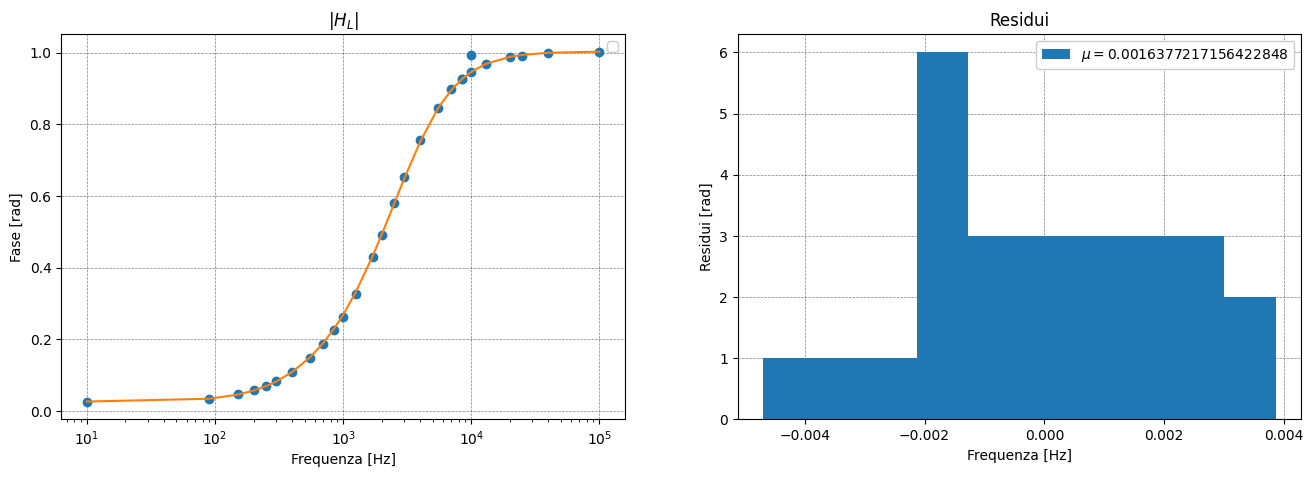

In [158]:
x = np.linspace(np.min(freqs),np.max(freqs),100000)
plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(freqs, V_l, 'o', lw=1)
plt.plot(freqs, G_L(freqs*2*np.pi, **f_m.values.to_dict()))
plt.title('$|H_L|$')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Fase [rad]')
plt.xscale('log')
plt.legend()

plt.subplot(1,2,2)
res = V_l - G_L(freqs*2*np.pi, **f_m.values.to_dict())
# plt.plot(freqs[_i_range], res[_i_range], 'o--', lw=1)
# plt.xscale('log')
plt.hist(res[_i_range], bins=10)
plt.title('Residui')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Residui [rad]')
plt.legend([f'$\mu = {np.mean(res)}$'])
plt.savefig('imgs/RL/H_L_mod.pdf', bbox_inches='tight')

# R

In [159]:
c = LeastSquares(freqs[_i_range]*2*np.pi, V_res[_i_range], V_res_err[_i_range], G_R)
f_m = Minuit(c, R=997, R_L=39.9, L=0.04)
f_m.migrad()
f_m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.779e+06 (χ²/ndof = 251254.5)│              Nfcn = 80               │
│ EDM = 9.28e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │   932.9   │    3.4    │            │            │         │         │       │
│ 1 │ R_L  │   19.95   │   0.07    │            │            │         │         │       │
│ 2 │ L    │ 42.43e-3  │  0.16e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────────────────┐
│     │          R        R_L          L │
├─────┼──────────────────────────────────┤
│   R │       11.8      0.252 536.130e-6 │
│ R_L │      0.252     0.0054  11.467e-6 │
│   L │ 536.130e-6  11.467e-6   2.44e-08 │
└─────┴──────────────────────────────────┘

In [160]:
c = LeastSquares(freqs[_i_range]*2*np.pi, -fase_res[_i_range], 0.01, fase_R)
f_f = Minuit(c, R=997, R_L=39.9, L=0.04)
f_f.migrad()
f_f.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 83.74 (χ²/ndof = 3.6)      │              Nfcn = 98               │
│ EDM = 1.19e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    207    │    25     │            │            │         │         │       │
│ 1 │ R_L  │    43     │    25     │            │            │         │         │       │
│ 2 │ L    │  -0.0114  │  0.0011   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────┐
│     │           R         R_L           L │
├─────┼─────────────────────────────────────┤
│   R │         621      -0.3e3 -14.1818e-3 │
│ R_L │      -0.3e3         621 -14.1827e-3 │
│   L │ -14.1818e-3 -14.1827e-3    1.29e-06 │
└─────┴─────────────────────────────────────┘

C:\Users\yehan\AppData\Local\Temp\ipykernel_4160\4237494250.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


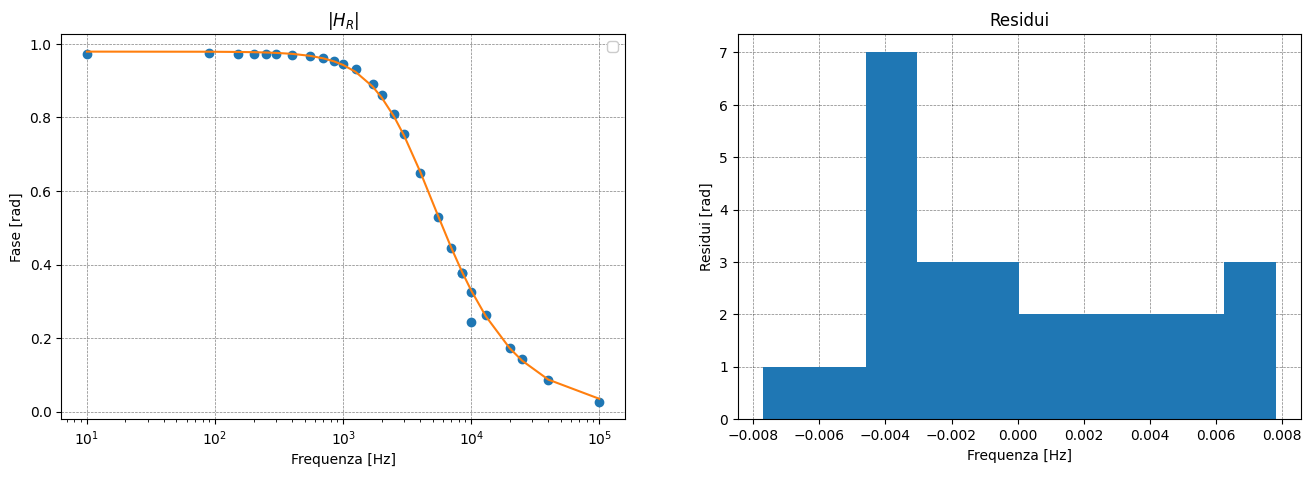

In [161]:
x = np.linspace(np.min(freqs),np.max(freqs),100000)
plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(freqs, V_res, 'o', lw=1)
plt.plot(freqs, G_R(freqs*2*np.pi, **f_m.values.to_dict()))
plt.title('$|H_R|$')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Fase [rad]')
plt.xscale('log')
plt.legend()

plt.subplot(1,2,2)
res = V_res - G_R(freqs*2*np.pi, **f_m.values.to_dict())
# plt.plot(freqs[_i_range], res[_i_range], 'o--', lw=1)
# plt.xscale('log')
plt.hist(res[_i_range], bins=10)
plt.title('Residui')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Residui [rad]')

plt.savefig('imgs/RL/H_R_mod.pdf', bbox_inches='tight')